In [3]:
# из тьюториала Лизы
import re
import numpy as np

with open('anna.txt', encoding='utf-8') as f:
    anna = f.read()
with open('sonets.txt', encoding='utf-8') as f:
    sonets = f.read()

anna_sentences = re.split(r'(?:[.]\s*){3}|[.?!]', anna)
sonet_sentences = re.split(r'(?:[.]\s*){3}|[.?!]', sonets)

#print(None in anna_sentences)
#print(len(anna_sentences), len(sonet_sentences))

In [74]:
# Первая часть первого пункта 


#Вариант 1.
# находим длину предложения в буквах
sentence_letters = re.compile('\w')
anna_len_sentence = []
sonet_len_sentence = []

# для корпуса Анны Карениной
for sentence in anna_sentences:
    anna_len_sentence.append(len(sentence_letters.findall(sentence)))
    #print(anna_len_sentence)
    
# для корпуса сонет
for sent in sonet_sentences:
    sonet_len_sentence.append(len(sentence_letters.findall(sent)))
    #print(sonet_len_sentence)
    
# число различных букв в предложении
anna_number_letters = []
sonet_number_letter = []

for sente in anna_sentences:
    anna_number_letters.append(len(set(sentence_letters.findall(sente))))
    #print(anna_len_sentence)
    
# для корпуса сонет
for se in sonet_sentences:
    sonet_number_letter.append(len(set(sentence_letters.findall(se))))
    #print(sonet_len_sentence)
    

# находим число гласных в предложении
sentence_vowels = re.compile('а|о|у|э|ы|е|ё|я|ю|и')
anna_len_vowels = []
sonet_len_vowels = []

# для корпуса Анны Карениной
for sen in anna_sentences:
    anna_len_vowels.append(len(sentence_vowels.findall(sen)))
    #print(anna_len_vowels)

# для корпуса сонет
for s in sonet_sentences:
    sonet_len_vowels.append(len(sentence_vowels.findall(s)))
    #print(sonet_len_vowels)

from statistics import median

# находим медиану числа букв в предложении

anna_mediana_letters = median(sorted(anna_len_sentence))
sonet_mediana_letters = median(sorted(sonet_len_sentence))

# находим медиану числа гласных в предложении

anna_mediana_vowels = median(sorted(anna_len_vowels))
sonet_mediana_vowels = median(sorted(sonet_len_vowels))


In [63]:
anna_mediana_letters

44

In [75]:
data_anna = []
data_sonet = []

data_anna.append([anna_len_sentence, anna_number_letters, anna_len_vowels, anna_mediana_letters, anna_mediana_vowels])
data_sonet.append([sonet_len_sentence, sonet_number_letter, sonet_len_vowels, sonet_mediana_letters, sonet_mediana_vowels])

In [52]:
# Вариант 2. Из тьюториала Лизы. Почему-то не работает.
#def len_sentences(sentence):
#    return [len(s) for s in sentence.split()]

#    sentence_letters = re.compile('\w')
#    sentence_vowels = re.compile('а|о|у|э|ы|е|ё|я|ю|и')

#    anna_sentlens = [sentence_letters(sentence) for sentence in anna_sentences if len(sentence_letters(sentence)) > 0]
#    sonet_sentlens = [sentence_letters(sentence) for sentence in sonet_sentences if len(sentence_letters(sentence)) > 0]
#    anna_data = [(len(sentence_letters(sentence)), len(sentence_vowels(sentence)), np.median(sentence_letters), np.median(sentence_vowels), sentence) 
#                 for sentence in anna_sentlens]

#    sonet_data = [(len(sentence), np.mean(sentence), np.median(sentence), np.std(sentence), sentence) 
#                  for sentence in sonet_sentlens]

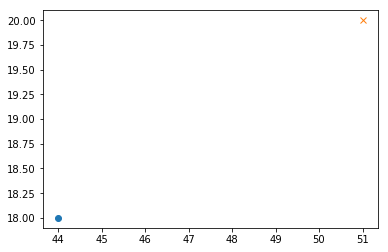

In [80]:
# Вторая часть первого пункта
# Рисование графиков с matplotlib

from matplotlib import pyplot as plt

data_anna = np.array(data_anna)
data_sonet = np.array(data_sonet)
plt.figure()
# не работает
#plt.plot(anna_d[:, 0], anna_d[:, 3], 'o')
#plt.plot(sonet_d[:,0], sonet_d[:,3], 'x')
plt.plot(anna_d[:,2], anna_d[:,3], 'o')
plt.plot(sonet_d[:,2], sonet_d[:,3], 'x')
plt.show() # как-то не такой график я ожидала увидеть...
